# Practica Integradora grupo 6BM1

- Carmona Serrano Ian Carlo
- Mendez López Luz Fernanda


# Introducción

En esta práctica, abordaremos el análisis de opiniones utilizando técnicas de procesamiento de lenguaje natural (NLP) y aprendizaje automático. Nuestro objetivo es comprender y clasificar opiniones en las categorías: positivo negativo o neutro.

Para lograr esto, seguiremos un enfoque estructurado que abarca desde la carga de datos hasta la evaluación de modelos clasificadores. En la primera parte de la práctica, nos enfocamos en la preparación inicial de los datos, comprendiendo la estructura y el formato de las opiniones, así como realizando tareas de preprocesamiento de texto y convirtiendo el texto en vectores utilizando la técnica TF-IDF.

Ahora, en la segunda parte de la práctica, utilizaremos CountVectorizer para convertir el texto preprocesado en vectores. Esto nos permitirá entrenar y evaluar los modelos clasificadores Naive Bayes y RandomForest. Por útimo, analizaremos los resultados obtenidos, evaluaremos la precisión (Accuracy), la sensibilidad (Recall) y la puntuación F1, además de la matriz de confusión para comprender cómo los modelos están clasificando las opiniones en las diferentes categorías.



Importamos Librerias


In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.metrics import edit_distance
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score


In [3]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv("./datasets/sentiment_analysis_dataset.csv")

# Tamaño del dataset
tamaño_dataset = data.shape

# Dimensionalidad
dimensionalidad = data.shape[1]  # Número de columnas

# Tipo de datos
tipos_de_datos = data.dtypes

# Distribución de clases
distribucion_clases = data["sentiment"].value_counts()

# Balance de clases
balance_clases = data["sentiment"].value_counts(normalize=True)

# Calidad de los datos
datos_faltantes = data.isnull().sum()

# Variables específicas
variables_especificas = data.columns.tolist()  # Lista de nombres de columnas

print("\n")
print("Tamaño del dataset:", tamaño_dataset)
print("\n")
print("Dimensionalidad:", dimensionalidad)
print("\n")
print("Tipos de datos:", tipos_de_datos)
print("\n")
print("Distribución de clases:", distribucion_clases)
print("\n")
print("Balance de clases:", balance_clases)
print("\n")
print("Datos faltantes:", datos_faltantes)
print("\n")
print("Variables específicas:", variables_especificas)



Tamaño del dataset: (2590, 5)


Dimensionalidad: 5


Tipos de datos: user         object
text         object
date         object
emotion      object
sentiment    object
dtype: object


Distribución de clases: sentiment
peaceful    660
mad         530
powerful    420
sad         360
joyful      350
scared      270
Name: count, dtype: int64


Balance de clases: sentiment
peaceful    0.254826
mad         0.204633
powerful    0.162162
sad         0.138996
joyful      0.135135
scared      0.104247
Name: proportion, dtype: float64


Datos faltantes: user         0
text         0
date         0
emotion      0
sentiment    0
dtype: int64


Variables específicas: ['user', 'text', 'date', 'emotion', 'sentiment']


In [4]:
df = pd.read_csv("./datasets/sentiment_analysis_dataset.csv")
stop_words = set(stopwords.words("spanish"))

In [5]:
# Función para limpiar el texto
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|@[^\s]+|[^a-zA-Z\s]", "", text)
    return text

In [6]:
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and len(token) > 3
    ]
    return " ".join(lemmatized_tokens)

In [7]:
# Aplicar limpieza y lematización al texto de los tweets
df["clean_text"] = df["text"].apply(clean_text)
df["preprocessed_text"] = df["clean_text"].apply(preprocess_text)

# Guardar el conjunto de datos preprocesado
df.to_csv("dataset_preprocesado.csv", index=False)

In [8]:
# Definir grupos de sentimientos
sentimientos_positivos = {"joyful", "peaceful", "powerful"}
sentimientos_neutros = {"mad"}
sentimientos_negativos = {"sad", "scared"}


def asignar_nuevo_sentimiento(sentiment):
    if sentiment in sentimientos_positivos:
        return "positivo"
    elif sentiment in sentimientos_neutros:
        return "neutro"
    elif sentiment in sentimientos_negativos:
        return "negativo"
    else:
        return None  # Si no coincide con ningún sentimiento, retornar None


# Aplicar la función a cada fila del DataFrame
df["nuevosentimiento"] = df["sentiment"].apply(asignar_nuevo_sentimiento)

# Inicializar conjuntos para almacenar las palabras únicas de cada sentimiento
palabras_positivas = set()
palabras_neutras = set()
palabras_negativas = set()

# Agrupar el conjunto de datos por sentimiento
grupos_sentimiento = df.groupby("sentiment")

# Iterar sobre cada grupo de datos
for sentimiento, grupo in grupos_sentimiento:
    # Concatenar todos los textos preprocesados para el sentimiento actual
    textos = " ".join(grupo["preprocessed_text"])

    # Tokenizar los textos y contar la frecuencia de cada palabra
    contador_palabras = Counter(textos.split())

    # Filtrar las palabras que ya han sido vistas en otros sentimientos
    for palabra, frecuencia in contador_palabras.most_common(50):
        # Verificar si la palabra ya está en otro conjunto de palabras clave
        if (
            palabra in palabras_positivas
            or palabra in palabras_neutras
            or palabra in palabras_negativas
        ):
            continue

        # Asignar la palabra al conjunto de palabras clave correspondiente
        if sentimiento in sentimientos_positivos:
            palabras_positivas.add(palabra)
        elif sentimiento in sentimientos_neutros:
            palabras_neutras.add(palabra)
        elif sentimiento in sentimientos_negativos:
            palabras_negativas.add(palabra)

# Mostrar las primeras 50 palabras únicas de cada sentimiento
print("Sentimientos positivos:")
print(", ".join(list(palabras_positivas)[:50]))
print("\n")

print("Sentimientos neutros:")
print(", ".join(list(palabras_neutras)[:50]))
print("\n")

print("Sentimientos negativos:")
print(", ".join(list(palabras_negativas)[:50]))
print("\n")


# Guardar las primeras 50 palabras únicas de cada sentimiento en variables
primeras_50_positivas = list(palabras_positivas)[:50]
primeras_50_neutras = list(palabras_neutras)[:50]
primeras_50_negativas = list(palabras_negativas)[:50]

Sentimientos positivos:
valiente, vida, tiempo, trabajo, victorioso, pensar, intrpido, solo, puede, apacible, saben, competente, hacer, debe, juerguista, despreocupado, feliz, travesura, lugar, sino, corazn, aquel, gratitud, alguien, casa, imperturbable, convencido, bien, positivo, viendo, seguridad, triunfo, prosperidad, hace, impactado, motivado, quiero, cuenta, entender, osada, odia, imparable, festivo, querer, efectivo, esperanzado, bueno, desvergonzado, cosas, autoconfianza


Sentimientos neutros:
sueo, mejor, ando, competitivo, tener, molesto, sido, envidioso, creo, jugar, puedo, dice, idea, verdad, apartado, siento, gracias, decir, madre, celoso, persona, compulsivo, granhermano, furioso, inseguro, despus, frustrado, toda, siempre, nadie, amor, contrariado, sentir, desilusionado, buenos, rpido, pasin


Sentimientos negativos:
tmido, enredado, tambin, atolondrado, desamparado, colapsado, rechazado, haba, flojera, sooliento, autoconsciente, desorientado, incomodo, veces, desconcer

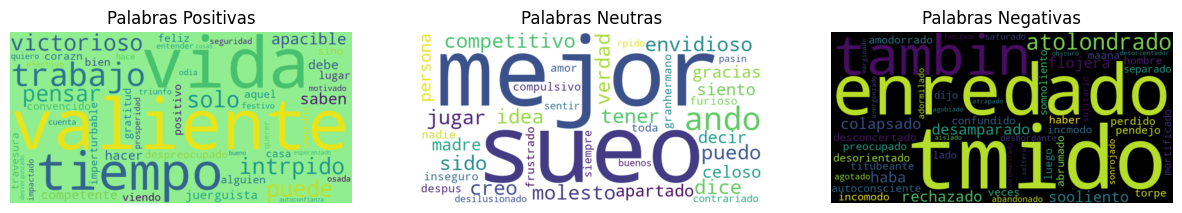

In [9]:
# Convertir las listas en cadenas de texto
textos_positivos = " ".join(primeras_50_positivas)
textos_neutros = " ".join(primeras_50_neutras)
textos_negativos = " ".join(primeras_50_negativas)

# Crear nubes de palabras para cada categoría de sentimiento
wordcloud_positivos = WordCloud(
    width=800, height=400, background_color="lightgreen"
).generate(textos_positivos)
wordcloud_neutros = WordCloud(width=800, height=400, background_color="white").generate(
    textos_neutros
)
wordcloud_negativos = WordCloud(
    width=800, height=400, background_color="black"
).generate(textos_negativos)

# Mostrar las nubes de palabras
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positivos, interpolation="bilinear")
plt.title("Palabras Positivas")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutros, interpolation="bilinear")
plt.title("Palabras Neutras")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negativos, interpolation="bilinear")
plt.title("Palabras Negativas")
plt.axis("off")

plt.show()

In [10]:
# Definir la función para contabilizar componentes sintácticos
def contabilizar_componentes_sintacticos(texto, palabras_clave_sentimiento):
    # Tokenizar el texto y etiquetar partes del discurso
    tokens = nltk.word_tokenize(texto)
    pos_tags = nltk.pos_tag(tokens)

    # Inicializar contadores para adjetivos, verbos y sustantivos
    adjetivos = 0
    verbos = 0
    sustantivos = 0

    # Contabilizar componentes sintácticos asociados con palabras clave del sentimiento
    for palabra, pos_tag in pos_tags:
        if palabra in palabras_clave_sentimiento:
            if pos_tag.startswith("JJ"):  # Adjetivo
                adjetivos += 1
            elif pos_tag.startswith("VB"):  # Verbo
                verbos += 1
            elif pos_tag.startswith("NN"):  # Sustantivo
                sustantivos += 1

    return adjetivos, verbos, sustantivos


# Palabras clave por sentimiento
palabras_clave_sentimientos = {
    "positivo": palabras_positivas,
    "neutro": palabras_neutras,
    "negativo": palabras_negativas,
}

# Aplicar la función a cada texto y extraer los componentes sintácticos
for sentimiento, palabras_clave_sentimiento in palabras_clave_sentimientos.items():
    (
        df[f"adjetivos_{sentimiento}"],
        df[f"verbos_{sentimiento}"],
        df[f"sustantivos_{sentimiento}"],
    ) = zip(
        *df["preprocessed_text"].apply(
            lambda x: contabilizar_componentes_sintacticos(
                x, palabras_clave_sentimiento
            )
        )
    )

df.to_csv("dataset_preprocesado.csv", index=False)

In [11]:
df.head(5)

,user,text,date,emotion,sentiment,clean_text,preprocessed_text,nuevosentimiento,adjetivos_positivo,verbos_positivo,sustantivos_positivo,adjetivos_neutro,verbos_neutro,sustantivos_neutro,adjetivos_negativo,verbos_negativo,sustantivos_negativo
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared,termine bien abrumado despus de hoy,termine bien abrumado despus,negativo,0,0,1,0,0,1,0,0,1
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared,me siento abrumado,siento abrumado,negativo,0,0,0,0,0,1,0,0,1
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared,Me siento un poco abrumado por la cantidad de ...,siento abrumado cantidad cosas quiero dibujar ...,negativo,0,0,2,0,0,2,0,0,1
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared,Salvador la nica persona que no la ha abrumado...,salvador nica persona abrumado versiones nadie...,negativo,0,0,0,0,0,1,0,0,1
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared,Denme un helado o algo que ando full abrumado,denme helado ando full abrumado,negativo,0,0,0,0,1,0,0,0,1


# Clasificacion


Precisión del modelo con naive bayes: 0.6718146718146718
Precisión del modelo con random forest: 0.6988416988416989


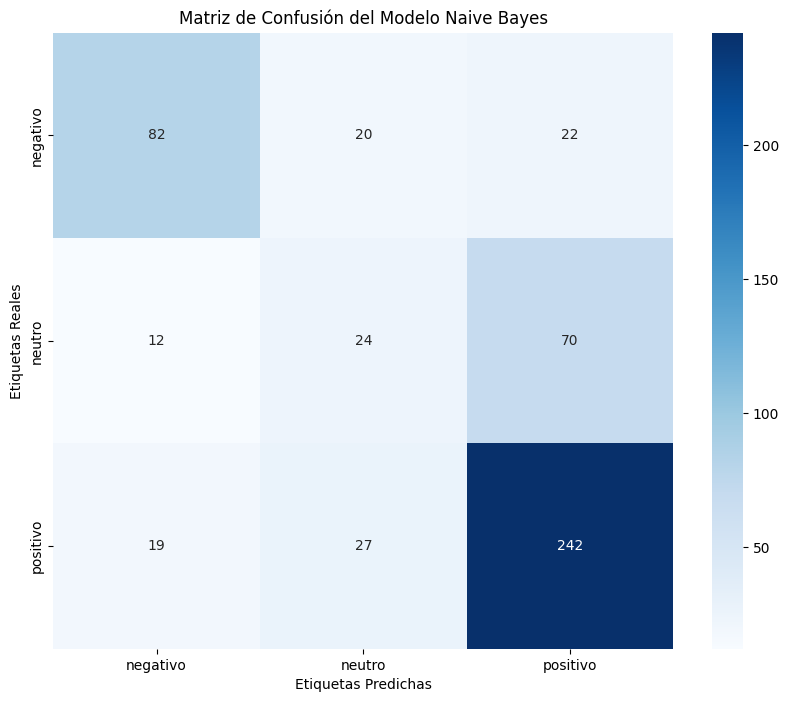

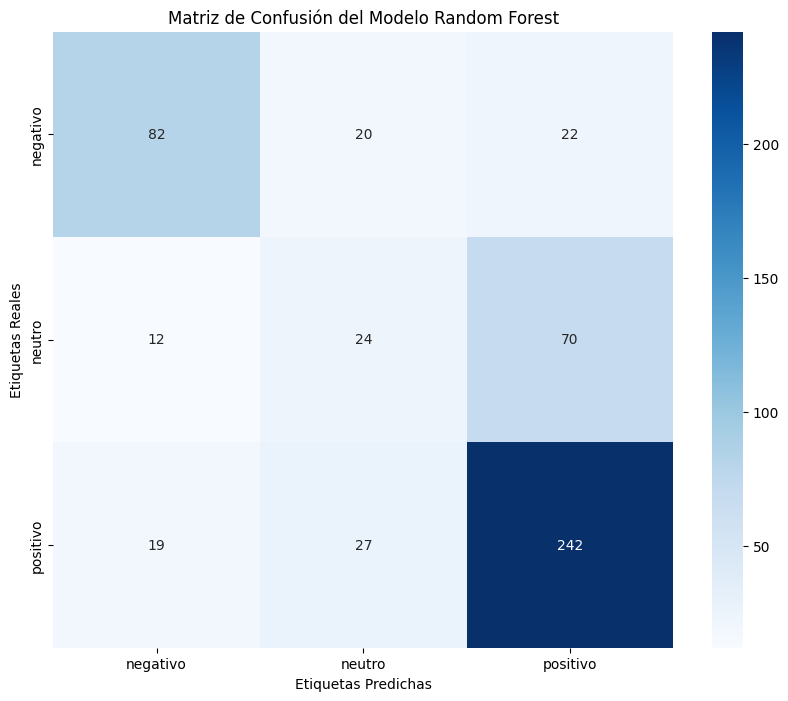

In [13]:

import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Paso 1: Cargar el conjunto de datos CSV
data = pd.read_csv("./dataset_preprocesado.csv")

# Paso 2: Seleccionar características relevantes para el modelo
X = data[
    [
        "adjetivos_positivo",
        "verbos_positivo",
        "sustantivos_positivo",
        "adjetivos_neutro",
        "verbos_neutro",
        "sustantivos_neutro",
        "adjetivos_negativo",
        "verbos_negativo",
        "sustantivos_negativo",
    ]
]

# Paso 3: Seleccionar la etiqueta (nuevosentimiento)
y = data["nuevosentimiento"]

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Paso 5: Entrenar el modelo Naive Bayes
model = GaussianNB()
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
model_2.fit(X_train, y_train)

# Paso 6: Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo con naive bayes:", accuracy)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Precisión del modelo con random forest:", accuracy_2)

# Paso 8: Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)


# Paso 9: Graficar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión del Modelo Naive Bayes')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

In [15]:
def contabilizar_componentes_sintacticos(texto, palabras_clave_sentimientos):
    tokens = nltk.word_tokenize(texto)
    pos_tags = nltk.pos_tag(tokens)
    
    # Inicializar contadores para cada categoría de sentimiento
    adjetivos_por_sentimiento = {'positivo': 0, 'neutro': 0, 'negativo': 0}
    verbos_por_sentimiento = {'positivo': 0, 'neutro': 0, 'negativo': 0}
    sustantivos_por_sentimiento = {'positivo': 0, 'neutro': 0, 'negativo': 0}
    
    # Contabilizar componentes sintácticos para cada categoría de sentimiento
    for palabra, pos_tag in pos_tags:
        for sentimiento, palabras_clave in palabras_clave_sentimientos.items():
            if palabra in palabras_clave:
                if pos_tag.startswith("JJ"):  # Adjetivo
                    adjetivos_por_sentimiento[sentimiento] += 1
                elif pos_tag.startswith("VB"):  # Verbo
                    verbos_por_sentimiento[sentimiento] += 1
                elif pos_tag.startswith("NN"):  # Sustantivo
                    sustantivos_por_sentimiento[sentimiento] += 1
                    
    return adjetivos_por_sentimiento, verbos_por_sentimiento, sustantivos_por_sentimiento

# Cargar los datos de la nueva instancia
nuevo_texto = input("Ponga el texto a clasificar: ")

# Extraer características sintácticas del nuevo texto
adjetivos_por_sentimiento, verbos_por_sentimiento, sustantivos_por_sentimiento = contabilizar_componentes_sintacticos(nuevo_texto, palabras_clave_sentimientos)

from sklearn.preprocessing import StandardScaler


nueva_instancia = {
    'adjetivos_positivo': adjetivos_por_sentimiento['positivo'],
    'verbos_positivo': verbos_por_sentimiento['positivo'],
    'sustantivos_positivo': sustantivos_por_sentimiento['positivo'],
    'adjetivos_neutro': adjetivos_por_sentimiento['neutro'],
    'verbos_neutro': verbos_por_sentimiento['neutro'],
    'sustantivos_neutro': sustantivos_por_sentimiento['neutro'],
    'adjetivos_negativo': adjetivos_por_sentimiento['negativo'],
    'verbos_negativo': verbos_por_sentimiento['negativo'],
    'sustantivos_negativo': sustantivos_por_sentimiento['negativo']
}

nuevos_datos = pd.DataFrame([nueva_instancia])

# Paso 4: Preprocesar los nuevos datos (asegurarse de aplicar el mismo preprocesamiento que se aplicó a los datos de entrenamiento)
scaler = StandardScaler()  # Inicializar el StandardScaler
nuevos_datos_preprocesados = scaler.fit_transform(nuevos_datos)  # Escalar las características de la nueva instancia

# Paso 5: Hacer la predicción para la nueva instancia
etiqueta_predicha = model.predict(nuevos_datos_preprocesados)
etiqueta_predicha_2 = model_2.predict(nuevos_datos_preprocesados)

# Paso 6: Mostrar la etiqueta predicha
print(nuevo_texto)
print("La etiqueta predicha con naive bayes para la nueva instancia es:", etiqueta_predicha)
print("La etiqueta predicha con random forest para la nueva instancia es:", etiqueta_predicha_2)


no me gusto el producto porque fallo demaciado 
La etiqueta predicha con naive bayes para la nueva instancia es: ['positivo']
La etiqueta predicha con random forest para la nueva instancia es: ['positivo']


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Conclusión

Aunque la precisión del modelo Random Forest fue ligeramente superior a la de Naive Bayes, la precisión fue en realidad baja, creemos que podríamos hacer algunas cosas para mejorar el rendimiento del modelo.
Antes de hablar de las mejoras que podríamos implementar, hay que hablar de las limitaciones de cada modelo:
Limitaciones de Naive Bayes:
- Suposición de independencia condicional: Naive Bayes asume que todas las características son independientes entre sí, lo cual puede ser una limitación en casos donde las características están correlacionadas.
- Sensibilidad a datos desbalanceados: Si hay desequilibrio en la distribución de clases,el rendimiento puede disminuir, pues  este asigna probabilidades proporcionales a la frecuencia de las características en cada clase.

Limitaciones de RandomForest:
-Tendencia al sobreajuste: RandomForest puede ser propenso al sobreajuste, especialmente en conjuntos de datos pequeños o con características ruidosas.
-Complejidad computacional: RandomForest puede ser computacionalmente más costoso cuando el conjunto de datos es grande o el  número de árboles es alto.

Estas son las mejoras que creemos podrían mejorar el rendimiento del modelo:

Identificar las características más importantes para predecir el sentimiento y usar solo esas características en el modelo, podríamos juntar modelos para obtener una mejor predicción, incluso podríamos utilizar embeddingspara representar las palabras en un espacio semántico continuo para capturar mejor la relación entre las palabras y mejorar la comprensión del sentimiento.
